In [ ]:
# import zipfile

# # Path to your ZIP file in Google Drive or a direct download path
# zip_path = '/content/train.zip'
# output_path = '/content/'  # Extraction directory in local storage

# # Extract the ZIP file
# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(output_path)

# print("Extraction completed.")


Extraction completed.


In [ ]:
import numpy as np
import cv2
from PIL import Image
from matplotlib import pyplot as plt
import os
from os import listdir
from os.path import isfile, join
import pandas as pd

In [ ]:
def load_images_from_folder(folder):
    train_data=[]
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename),cv2.IMREAD_GRAYSCALE)
        img=~img
        if img is not None:
            ret,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)

            ctrs,ret=cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
            cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
            w=int(28)
            h=int(28)
            maxi=0
            for c in cnt:
                x,y,w,h=cv2.boundingRect(c)
                maxi=max(w*h,maxi)
                if maxi==w*h:
                    x_max=x
                    y_max=y
                    w_max=w
                    h_max=h
            im_crop= thresh[y_max:y_max+h_max+10, x_max:x_max+w_max+10]
            im_resize = cv2.resize(im_crop,(28,28))
            im_resize=np.reshape(im_resize,(784,1))
            train_data.append(im_resize)
    return train_data

In [ ]:
data=[]

In [ ]:
# Assign '-' = 10
data=load_images_from_folder('/content/train/-')
len(data)
for i in range(0,len(data)):
    data[i]=np.append(data[i],['10'])

print(len(data))

33997


In [ ]:
# Assign + = 11
data11=load_images_from_folder('/content/train/+')

for i in range(0,len(data11)):
    data11[i]=np.append(data11[i],['11'])
data=np.concatenate((data,data11))
print(len(data))

59109


In [ ]:
data0=load_images_from_folder('/content/train/0')

for i in range(0,len(data0)):
    data0[i]=np.append(data0[i],['0'])
data=np.concatenate((data,data0))
print(len(data))

66023


In [ ]:
data1=load_images_from_folder('/content/train/1')

for i in range(0,len(data1)):
    data1[i]=np.append(data1[i],['1'])
data=np.concatenate((data,data1))
print(len(data))

92543


In [ ]:
data2=load_images_from_folder('/content/train/2')

for i in range(0,len(data2)):
    data2[i]=np.append(data2[i],['2'])
data=np.concatenate((data,data2))
print(len(data))

118684


In [ ]:
data3=load_images_from_folder('/content/train/3')

for i in range(0,len(data3)):
    data3[i]=np.append(data3[i],['3'])
data=np.concatenate((data,data3))
print(len(data))

129593


In [ ]:
data4=load_images_from_folder('/content/train/4')

for i in range(0,len(data4)):
    data4[i]=np.append(data4[i],['4'])
data=np.concatenate((data,data4))
print(len(data))

136989


In [ ]:
data5=load_images_from_folder('/content/train/5')

for i in range(0,len(data5)):
    data5[i]=np.append(data5[i],['5'])
data=np.concatenate((data,data5))
print(len(data))

140534


In [ ]:
data6=load_images_from_folder('/content/train/6')

for i in range(0,len(data6)):
    data6[i]=np.append(data6[i],['6'])
data=np.concatenate((data,data6))
print(len(data))

143652


In [ ]:
data7=load_images_from_folder('/content/train/7')

for i in range(0,len(data7)):
    data7[i]=np.append(data7[i],['7'])
data=np.concatenate((data,data7))
print(len(data))

146561


In [ ]:
data8=load_images_from_folder('/content/train/8')

for i in range(0,len(data8)):
    data8[i]=np.append(data8[i],['8'])
data=np.concatenate((data,data8))
print(len(data))

149629


In [ ]:
data9=load_images_from_folder('/content/train/9')

for i in range(0,len(data9)):
    data9[i]=np.append(data9[i],['9'])
data=np.concatenate((data,data9))
print(len(data))

153366


In [ ]:
df=pd.DataFrame(data,index=None)
df.to_csv('train_final.csv',index=False)

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import pickle

In [ ]:
df_train=pd.read_csv('/content/train_final (4).csv',index_col=False)
labels=df_train[['784']]

In [ ]:
df_train.drop(df_train.columns[[784]],axis=1,inplace=True)
df_train.head(10)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
4,177,0,0,0,0,0,0,0,0,196,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,255,255,255,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,255,255,255,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
np.random.seed(1212)
import numpy as np
import keras
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

from keras import backend as K
print(K.image_data_format())



channels_last


In [ ]:
labels=np.array(labels)

In [ ]:
from tensorflow.keras.utils import to_categorical
cat=to_categorical(labels,num_classes=13)

In [ ]:
print(cat[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
df_train.head(10)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
4,177,0,0,0,0,0,0,0,0,196,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,255,255,255,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,255,255,255,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_train.shape

(153366, 784)

In [ ]:
temp=df_train.to_numpy()

In [ ]:
X_train = temp.reshape(temp.shape[0], 28, 28, 1)

In [ ]:
temp.shape[0]

153366

In [ ]:
X_train.shape

(153366, 28, 28, 1)

In [ ]:
l=[]
for i in range(50621):
    l.append(np.array(df_train[i:i+1]).reshape(1,28,28))

In [ ]:
np.random.seed(7)

In [ ]:
X_train.shape

(153366, 28, 28, 1)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28, 28,1), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(13, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from keras.models import model_from_json

In [ ]:
model.fit(X_train, cat, epochs=10, batch_size=200,shuffle=True,verbose=1)

Epoch 1/10
629/767 ━━━━━━━━━━━━━━━━━━━━ 19s 142ms/step - accuracy: 0.9956 - loss: 0.0152

KeyboardInterrupt: 

In [ ]:

model_json = model.to_json()
with open("model_final.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.weights.h5")

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical  # Replaced np_utils
from tensorflow.keras import backend as K
from tensorflow.keras.models import model_from_json

# If you are using image_data_format, you can use this:
# K.set_image_data_format('channels_last')  # for TensorFlow


In [ ]:

json_file = open('model_final.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.weights.h5")

In [ ]:
import cv2
import numpy as np
img = cv2.imread('/content/test.jpg.png',cv2.IMREAD_GRAYSCALE)
img

array([[254, 254, 254, ..., 254, 254, 254],
       [219, 219, 219, ..., 221, 221, 221],
       [197, 197, 197, ..., 201, 202, 202],
       ...,
       [197, 196, 195, ..., 200, 200, 200],
       [196, 196, 196, ..., 200, 200, 200],
       [196, 196, 196, ..., 200, 200, 201]], dtype=uint8)

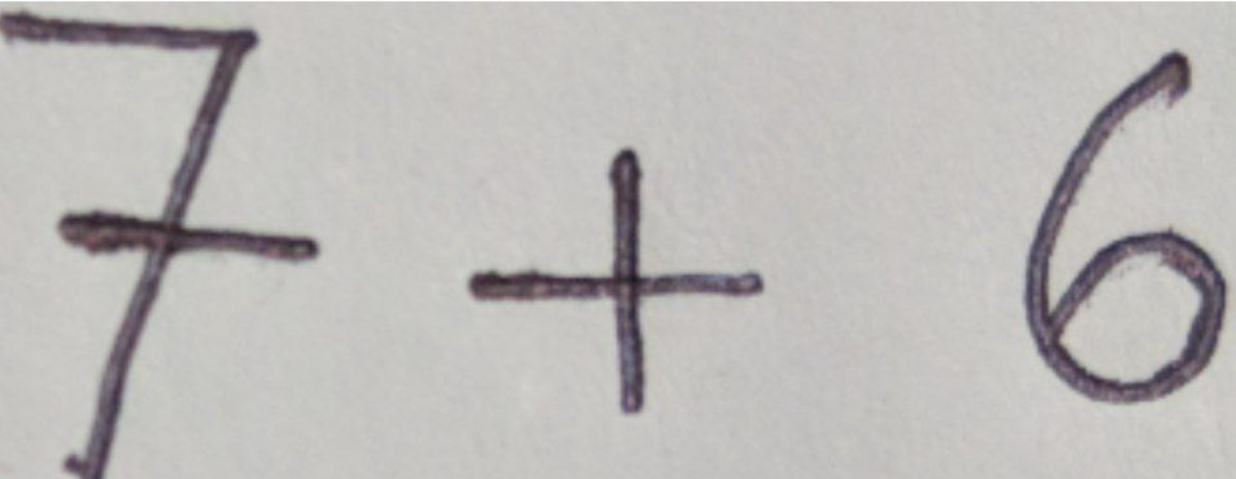

In [ ]:
from IPython import display
display.Image("/content/test.jpg.png",width=250)

In [ ]:
if img is not None:
    #images.append(img)
    img=~img
    ret,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    ctrs,ret=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
    w=int(28)
    h=int(28)
    train_data=[]
    print(len(cnt))
    rects=[]
    for c in cnt :
        x,y,w,h= cv2.boundingRect(c)
        rect=[x,y,w,h]
        rects.append(rect)
    print(rects)
    bool_rect=[]
    for r in rects:
        l=[]
        for rec in rects:
            flag=0
            if rec!=r:
                if r[0]<(rec[0]+rec[2]+10) and rec[0]<(r[0]+r[2]+10) and r[1]<(rec[1]+rec[3]+10) and rec[1]<(r[1]+r[3]+10):
                    flag=1
                l.append(flag)
            if rec==r:
                l.append(0)
        bool_rect.append(l)
    print(bool_rect)
    dump_rect=[]
    for i in range(0,len(cnt)):
        for j in range(0,len(cnt)):
            if bool_rect[i][j]==1:
                area1=rects[i][2]*rects[i][3]
                area2=rects[j][2]*rects[j][3]
                if(area1==min(area1,area2)):
                    dump_rect.append(rects[i])
    print(len(dump_rect))
    final_rect=[i for i in rects if i not in dump_rect]
    print(final_rect)
    for r in final_rect:
        x=r[0]
        y=r[1]
        w=r[2]
        h=r[3]
        im_crop =thresh[y:y+h+10,x:x+w+10]


        im_resize = cv2.resize(im_crop,(28,28))


        im_resize=np.reshape(im_resize,(28,28,1))
        train_data.append(im_resize)

11
[[0, 12, 318, 467], [470, 149, 293, 263], [628, 398, 5, 6], [741, 281, 9, 4], [1025, 52, 201, 350], [1059, 247, 144, 137], [1059, 194, 8, 10], [1079, 383, 3, 3], [1086, 152, 4, 6], [1195, 269, 4, 5], [1207, 275, 4, 3]]
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1], [0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]]
12
[[0, 12, 318, 467], [470, 149, 293, 263], [1025, 52, 201, 350]]


In [ ]:
import ast
s=''
for i in range(len(train_data)):
    train_data[i]=np.array(train_data[i])
    train_data[i]=train_data[i].reshape(1,28,28,1)
    result=np.argmax(loaded_model.predict(train_data[i]), axis=-1)
    if(result[0]==10):
        s=s+'-'
    if(result[0]==11):
        s=s+'+'
    if(result[0]==12):
        s=s+'*'
    if(result[0]==0):
        s=s+'0'
    if(result[0]==1):
        s=s+'1'
    if(result[0]==2):
        s=s+'2'
    if(result[0]==3):
        s=s+'3'
    if(result[0]==4):
        s=s+'4'
    if(result[0]==5):
        s=s+'5'
    if(result[0]==6):
        s=s+'6'
    if(result[0]==7):
        s=s+'7'
    if(result[0]==8):
        s=s+'8'
    if(result[0]==9):
        s=s+'9'

print('\nThe Output is:',eval(s))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step

The Output is: 13
